In [ ]:
#dataset @https://finance.yahoo.com/quote/MSFT/history

In [11]:
import pandas as pd
df = pd.read_csv('MSFT.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060809,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062980,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064067,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062437,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061351,47894400
...,...,...,...,...,...,...,...
9286,2023-01-17,237.970001,240.910004,237.089996,240.350006,240.350006,29831300
9287,2023-01-18,241.570007,242.380005,235.520004,235.809998,235.809998,30028700
9288,2023-01-19,233.779999,235.520004,230.679993,231.929993,231.929993,28623000
9289,2023-01-20,234.860001,240.740005,234.509995,240.220001,240.220001,35323400


In [21]:
df= df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9286,2023-01-17,240.350006
9287,2023-01-18,235.809998
9288,2023-01-19,231.929993
9289,2023-01-20,240.220001


In [22]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9286    2023-01-17
9287    2023-01-18
9288    2023-01-19
9289    2023-01-20
9290    2023-01-23
Name: Date, Length: 9291, dtype: object

In [25]:
import datetime

def str_to_datetime(s):
  split=s.split('-')
  year, month, day =int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year=year, month=month, day=day)
  datetime_object= str_to_datetime('1986-03-19')
  datetime_object
  datetime.datetime(1986, 3, 19, 0, 0)



In [26]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9286,2023-01-17,240.350006
9287,2023-01-18,235.809998
9288,2023-01-19,231.929993
9289,2023-01-20,240.220001


In [27]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9286   2023-01-17
9287   2023-01-18
9288   2023-01-19
9289   2023-01-20
9290   2023-01-23
Name: Date, Length: 9291, dtype: datetime64[ns]

In [28]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-01-17,240.350006
2023-01-18,235.809998
2023-01-19,231.929993


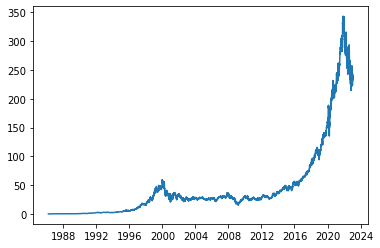

In [30]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['Close'])

In [34]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [35]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

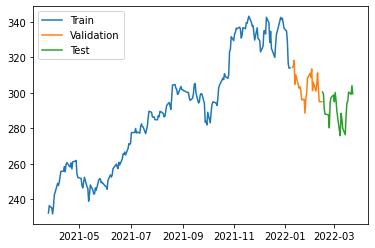

In [36]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 95ms/step - loss: 84703.0859 - mean_absolute_error: 289.2975 - val_loss: 92433.1562 - val_mean_absolute_error: 303.9411
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 84520.7500 - mean_absolute_error: 288.9805 - val_loss: 92250.0078 - val_mean_absolute_error: 303.6397
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 84338.0469 - mean_absolute_error: 288.6656 - val_loss: 92033.0938 - val_mean_absolute_error: 303.2823
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 84119.5391 - mean_absolute_error: 288.2875 - val_loss: 91780.2500 - val_mean_absolute_error: 302.8651
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 83857.1641 - mean_absolute_error: 287.8325 - val_loss: 91458.7188 - val_mean_absolute_error: 302.3338
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 83519.5234 - mean_absolute_error: 287.2438 - val_loss: 91052.50

7/7 [==============================] - 0s 3ms/step


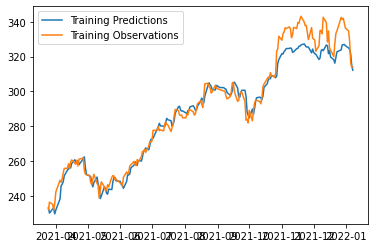

In [38]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 18ms/step


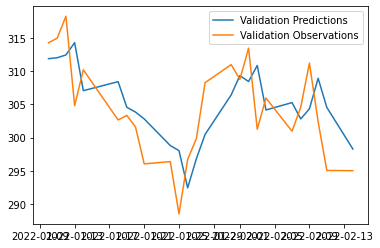

In [39]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 28ms/step


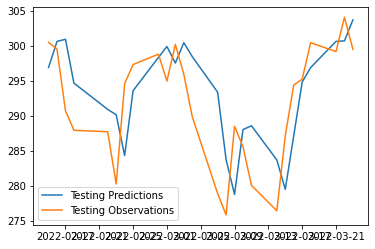

In [40]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

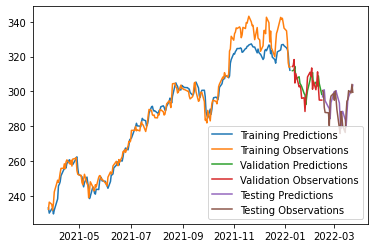

In [41]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [42]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 16ms/step


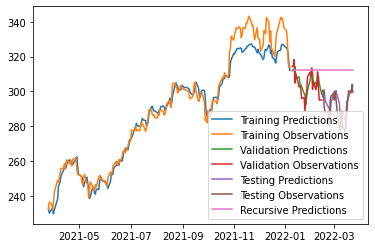

In [43]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])